# Setting

In [1]:
import bt
import FinanceDataReader as fdr
import pandas as pd
from pf_utils import buy_and_hold, backtest, get_start_dates, metrics

In [2]:
path_data = 'data'

In [3]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Data

## TDF 1

In [76]:
file = 'K55206C95800.csv'
df_tdf = pd.read_csv(f'{path_data}/{file}', parse_dates=[0])
df_tdf.tail()

,날짜,펀드,비교지수
1450,2024-06-07,34.09,0
1451,2024-06-10,34.81,0
1452,2024-06-11,34.68,0
1453,2024-06-12,34.94,0
1454,2024-06-13,34.95,0


In [77]:
df_tdf = df_tdf[['날짜','펀드']]
df_tdf.columns = ['date', 'K55206C95800']
df_tdf = df_tdf.set_index('date')
df_tdf.head()

,K55206C95800
date,
2018-07-26,0.00
2018-07-27,0.10
2018-07-30,0.28
2018-07-31,0.17
2018-08-01,0.13


In [78]:
df_tdf.tail()

,K55206C95800
date,
2024-06-07,34.09
2024-06-10,34.81
2024-06-11,34.68
2024-06-12,34.94
2024-06-13,34.95


In [79]:
# 2024.06.13 기준가:	1,293.01
#a = 1293.01 / (34.95/100+1)
# 2024.06.10 기준가:	1,291.67	
a = 1291.67 / (34.81/100+1)
a

958.1410874564201

In [80]:
df_tdf['K55206C95800'] = (df_tdf['K55206C95800']/100 + 1) * a 
df_tdf.tail()

,K55206C95800
date,
2024-06-07,1284.771384
2024-06-10,1291.670000
2024-06-11,1290.424417
2024-06-12,1292.915583
2024-06-13,1293.011398


In [81]:
df_tdf.head()

,K55206C95800
date,
2018-07-26,958.141087
2018-07-27,959.099229
2018-07-30,960.823883
2018-07-31,959.769927
2018-08-01,959.386671


In [10]:
# 2023.06.14 기준가:	1,154.82	
df_tdf.loc['2023-6-14']

K55206C95800    1154.847453
Name: 2023-06-14 00:00:00, dtype: float64

In [87]:
file = 'K55206C95800.csv'

def import_rate(file, path='.', cols=['date', None], data_check=None, rate_is_percent=True):
    """
    data_check: [(기준일1, 기준가1), (기준일2, 기준가2)]
    """
    df = pd.read_csv(f'{path}/{file}', parse_dates=[0], index_col=[0])
    if df.columns.size > 1:
        print('WARNING: taking the 1st two columns only ...')
        df = df.iloc[:, 0]

    df.rename_axis = cols[0]
    
    col_data = cols[1]
    if col_data is None:
        col_data = file.split('.')[0]
    df.name = col_data

    if data_check is not None:
        # convert to price with data_check[0]
        dt, price = data_check[0]
        dt = pd.to_datetime(dt)
        rate = df[dt]
        if rate_is_percent:
            rate = rate/100
            df = df/100
        price_base = price / (rate+1)
        df = (df + 1) * price_base 

        # check price
        dt, price = data_check[1]
        e = df[dt]/price - 1
        print(f'error: {e*100:.2f} %')

    else:
        print('WARNING: set data_check to get price')
    
    return df


#df = import_rate(file, path_data)

# 2024.06.10 기준가:	1,291.67
# 2023.06.14 기준가:	1,154.82	
data_check = [
    ('2024-6-10', 1291.67),
    ('2023-6-14', 1154.82)
]
df = import_rate(file, path_data, data_check=data_check)
df

error: 0.00 %


날짜
2018-07-26     958.141087
2018-07-27     959.099229
2018-07-30     960.823883
2018-07-31     959.769927
2018-08-01     959.386671
                 ...     
2024-06-07    1284.771384
2024-06-10    1291.670000
2024-06-11    1290.424417
2024-06-12    1292.915583
2024-06-13    1293.011398
Name: K55206C95800, Length: 1455, dtype: float64

## TDF2

In [11]:
file = 'K55301BU6139.csv'
df = pd.read_csv(f'{path_data}/{file}').T
df

,0
Unnamed: 0,투자수익률
2021-06-12,0
2021-06-13,0
2021-06-14,0.21
2021-06-15,0.31
...,...
2024-06-08,10.51
2024-06-09,10.51
2024-06-10,10.47
2024-06-11,10.67


In [12]:
df = df.iloc[1:, 0]
df.head()

2021-06-12       0
2021-06-13       0
2021-06-14    0.21
2021-06-15    0.31
2021-06-16    0.12
Name: 0, dtype: object

In [13]:
df.index = pd.to_datetime(df.index)
df = df.rename_axis('date')
df

date
2021-06-12        0
2021-06-13        0
2021-06-14     0.21
2021-06-15     0.31
2021-06-16     0.12
              ...  
2024-06-08    10.51
2024-06-09    10.51
2024-06-10    10.47
2024-06-11    10.67
2024-06-12    10.52
Name: 0, Length: 1097, dtype: object

In [14]:
# 2024.06.12	1,464.07		
a = 1464.07 / (10.52/100+1)
df = (df/100 + 1) * a 
df.tail()

date
2024-06-08    1463.937529
2024-06-09    1463.937529
2024-06-10    1463.407645
2024-06-11    1466.057066
2024-06-12        1464.07
Name: 0, dtype: object

In [15]:
# 2023.06.14	1,267.58	
df['2023-6-14']

1268.0128519724938

In [16]:
df_tdf['K55301BU6139'] = df
df_tdf

,K55206C95800,K55301BU6139
date,,
2018-07-26,958.141087,NaN
2018-07-27,959.099229,NaN
2018-07-30,960.823883,NaN
2018-07-31,959.769927,NaN
2018-08-01,959.386671,NaN
...,...,...
2024-06-07,1284.771384,1463.937529
2024-06-10,1291.670000,1463.407645
2024-06-11,1290.424417,1466.057066


In [17]:
tdf_names ={
    'K55206C95800': '키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)',
    'K55301BU6139': '미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e'
}

In [18]:
commissions = {
    'K55206C95800': 0.49, 
    'K55301BU6139': 0.6, 
}
{tdf_names[k]:v for k,v in commissions.items()}

{'키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)': 0.49,
 '미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e': 0.6}

In [19]:
get_start_dates(df_tdf)

,start date
K55206C95800,2018-07-26
K55301BU6139,2021-06-14


In [20]:
start_date = '2021-06-14'

In [21]:
df_tdf2 = df_tdf.loc[start_date:]

In [22]:
df_tdf2.isna().sum()

K55206C95800    0
K55301BU6139    1
dtype: int64

In [23]:
df_tdf2 = df_tdf2.ffill()

In [24]:
df_tdf2

,K55206C95800,K55301BU6139
date,,
2021-06-14,1246.349927,1327.492352
2021-06-15,1249.415978,1328.817062
2021-06-16,1250.278305,1326.300112
2021-06-17,1249.128536,1324.975402
2021-06-18,1251.044818,1323.385749
...,...,...
2024-06-07,1284.771384,1463.937529
2024-06-10,1291.670000,1463.407645
2024-06-11,1290.424417,1466.057066


## ETFS

In [25]:
file = 'etfs_selected_240611.csv'
df_etf = pd.read_csv(f'{path_data}/{file}', parse_dates=[0], index_col=0)
df_etf.head()

,273130,453850,284430,069500,379800,411060,305080,304660,148070,261220
Date,,,,,,,,,,
2002-10-14,NaN,NaN,NaN,5184,NaN,NaN,NaN,NaN,NaN,NaN
2002-10-15,NaN,NaN,NaN,5312,NaN,NaN,NaN,NaN,NaN,NaN
2002-10-16,NaN,NaN,NaN,5335,NaN,NaN,NaN,NaN,NaN,NaN
2002-10-17,NaN,NaN,NaN,5410,NaN,NaN,NaN,NaN,NaN,NaN
2002-10-18,NaN,NaN,NaN,5642,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_sym = fdr.StockListing('ETF/KR') # 한국 ETF 전종목

symbols = df_etf.columns
etf_names = df_sym.loc[df_sym.Symbol.isin(symbols)].set_index('Symbol')['Name'].to_dict()
etf_names

{'069500': 'KODEX 200',
 '273130': 'KODEX 종합채권(AA-이상)액티브',
 '379800': 'KODEX 미국S&P500TR',
 '453850': 'ACE 미국30년국채액티브(H)',
 '148070': 'KOSEF 국고채10년',
 '304660': 'KODEX 미국30년국채울트라선물(H)',
 '411060': 'ACE KRX금현물',
 '305080': 'TIGER 미국채10년선물',
 '284430': 'KODEX 200미국채혼합',
 '261220': 'KODEX WTI원유선물(H)'}

In [37]:
#etf = ['069500', '148070', '305080', '379800']
etf = ['069500', '273130', '148070', '379800']
{x: etf_names[x] for x in etf}

{'069500': 'KODEX 200',
 '273130': 'KODEX 종합채권(AA-이상)액티브',
 '148070': 'KOSEF 국고채10년',
 '379800': 'KODEX 미국S&P500TR'}

In [38]:
df_etf2 = df_etf.loc[start_date:, etf]
get_start_dates(df_etf2)

,start date
069500,2021-06-14
273130,2021-06-14
148070,2021-06-14
379800,2021-06-14


# Simulation

In [65]:
stg_dict = dict()
wts_dict = dict()

In [66]:
col = 'KOSPI'

index = df_tdf2.index
df = df_etf2.loc[index.min():index.max(), '069500']

weights = {'069500':1}
stg_dict[col] = buy_and_hold(df, col)
wts_dict[col] = weights

In [67]:
col = 'TDF COMB'
weights = dict(zip(df_tdf2.columns, [0.5, 0.5]))
stg_dict[col] = buy_and_hold(df_tdf2, name_stg=col)
wts_dict[col] = weights

In [68]:
col = 'ETF COMB1'

weights = [0.2, 0.2, 0.3, 0.3]
weights = dict(zip(etf, weights))
print({etf_names[k]:v for k,v in weights.items()})

stg_dict[col] = backtest(df_etf2, weights, col, period='Y')
wts_dict[col] = weights

{'KODEX 200': 0.2, 'KODEX 종합채권(AA-이상)액티브': 0.2, 'KOSEF 국고채10년': 0.3, 'KODEX 미국S&P500TR': 0.3}


In [69]:
col = 'ETF COMB2'

weights = [0.3, 0.2, 0.3, 0.2]
weights = dict(zip(etf, weights))
print({etf_names[k]:v for k,v in weights.items()})

stg_dict[col] = backtest(df_etf2, weights, col, period='Y')
wts_dict[col] = weights

{'KODEX 200': 0.3, 'KODEX 종합채권(AA-이상)액티브': 0.2, 'KOSEF 국고채10년': 0.3, 'KODEX 미국S&P500TR': 0.2}


,KOSPI,TDF COMB,ETF COMB1,ETF COMB2
total_return,-0.088176,0.069774,0.149799,0.078963
cagr,-0.030349,0.022774,0.047706,0.025699
max_drawdown,-0.335043,-0.173944,-0.116169,-0.142331
avg_drawdown,-0.118466,-0.020241,-0.009928,-0.012947
avg_drawdown_days,361.666667,73.714286,33.0,48.904762
daily_vol,0.164684,0.065325,0.068173,0.072774
daily_sharpe,-0.109444,0.385695,0.734232,0.393455
daily_sortino,-0.18641,0.618714,1.215624,0.653413
monthly_vol,0.190318,0.090244,0.083084,0.091949
monthly_sharpe,-0.093778,0.27882,0.569678,0.291545


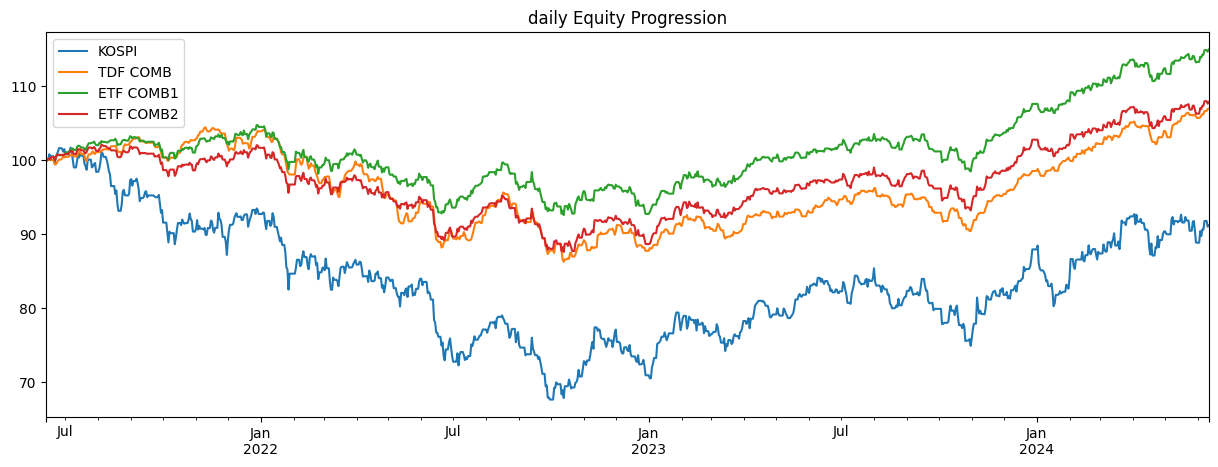

In [70]:
results = bt.run(*stg_dict.values())
results.plot(freq='d');
results.stats.loc[metrics]

In [71]:
wts_dict

{'KOSPI': {'069500': 1},
 'TDF COMB': {'K55206C95800': 0.5, 'K55301BU6139': 0.5},
 'ETF COMB1': {'069500': 0.2, '273130': 0.2, '148070': 0.3, '379800': 0.3},
 'ETF COMB2': {'069500': 0.3, '273130': 0.2, '148070': 0.3, '379800': 0.2}}

In [74]:
{etf_names[k]:v for k,v in wts_dict['ETF COMB1'].items()}

{'KODEX 200': 0.2,
 'KODEX 종합채권(AA-이상)액티브': 0.2,
 'KOSEF 국고채10년': 0.3,
 'KODEX 미국S&P500TR': 0.3}